# Import Data
First, import the datasets from google COVID data, and CDC 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.feature_extraction.text import CountVectorizer
google_indices = pd.read_csv("https://storage.googleapis.com/covid19-open-data/v3/index.csv")
google_demo = pd.read_csv("https://storage.googleapis.com/covid19-open-data/v3/demographics.csv")
google_epi = pd.read_csv("https://storage.googleapis.com/covid19-open-data/v3/epidemiology.csv")
google_hosp = pd.read_csv("https://storage.googleapis.com/covid19-open-data/v3/hospitalizations.csv")
CDC_data = pd.read_csv("Provisional_COVID-19_Deaths_by_Sex_and_Age_20240330.csv")
kaggle_data = pd.read_csv("Covid_Data.csv")

In [2]:
google_indices.head()

,location_key,place_id,wikidata_id,datacommons_id,country_code,country_name,subregion1_code,subregion1_name,subregion2_code,subregion2_name,locality_code,locality_name,iso_3166_1_alpha_2,iso_3166_1_alpha_3,aggregation_level
0,AD,ChIJlfCemC71pRIRkn_qeNc-yQc,Q228,country/AND,AD,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,AD,AND,0
1,AE,ChIJvRKrsd9IXj4RpwoIwFYv0zM,Q878,country/ARE,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,AE,ARE,0
2,AF,ChIJbQL_-LZu0TgReNqWvg1GtfM,Q889,country/AFG,AF,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,AF,AFG,0
3,AF_BAL,ChIJWZOescNSyzgRkmVJ8fmfR3k,Q121104,NaN,AF,Afghanistan,BAL,Balkh,NaN,NaN,NaN,NaN,AF,AFG,1
4,AF_BAM,ChIJw-bKQwDr0jgRQiw8jHsQ-HI,Q171382,NaN,AF,Afghanistan,BAM,Bamyan,NaN,NaN,NaN,NaN,AF,AFG,1


In [3]:
google_demo.head()

,location_key,population,population_male,population_female,population_rural,population_urban,population_largest_city,population_clustered,population_density,human_development_index,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_and_older
0,AD,77265.0,58625.0,55581.0,9269.0,67873.0,NaN,NaN,164.394,0.858,9370.0,12022.0,10727.0,12394.0,21001.0,20720.0,14433.0,8657.0,4881.0
1,AE,9890400.0,6836349.0,3054051.0,1290785.0,8479744.0,2833079.0,5914068.0,118.306,0.863,1011713.0,842991.0,2149343.0,3169314.0,1608109.0,797913.0,242707.0,55884.0,12426.0
2,AF,38928341.0,19976265.0,18952076.0,28244481.0,9797273.0,4114030.0,4114030.0,59.627,0.498,11088732.0,9821559.0,7035871.0,4534646.0,2963459.0,1840198.0,1057496.0,480455.0,105925.0
3,AF_BAL,1509183.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AF_BAM,495557.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
google_epi.head()

,date,location_key,new_confirmed,new_deceased,new_recovered,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested
0,2020-01-01,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
1,2020-01-02,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
2,2020-01-03,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
3,2020-01-04,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
4,2020-01-05,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN


In [5]:
google_hosp.head()

,date,location_key,new_hospitalized_patients,cumulative_hospitalized_patients,current_hospitalized_patients,new_intensive_care_patients,cumulative_intensive_care_patients,current_intensive_care_patients,new_ventilator_patients,cumulative_ventilator_patients,current_ventilator_patients
0,0022-01-10,AR,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,0022-01-20,AR,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,0202-03-30,AR,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,0221-07-06,AR,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1202-01-07,AR,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
CDC_data.head()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,All Ages,1146774.0,12303399.0,1162844.0,569264.0,22229.0,1760095.0,NaN
1,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,Under 1 year,519.0,73213.0,1056.0,95.0,64.0,1541.0,NaN
2,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,0-17 years,1696.0,130970.0,2961.0,424.0,509.0,4716.0,NaN
3,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,1-4 years,285.0,14299.0,692.0,66.0,177.0,1079.0,NaN
4,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,5-14 years,509.0,22008.0,818.0,143.0,219.0,1390.0,NaN


In [7]:
kaggle_data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


## Combine google subsets

The above subsets can be matched using location_key, so concatenate them into one full dataset. However, the datasets are too large to use pd.merge, so instead just import the aggregated csv from google and work with it.

In [8]:
google_aggregate = pd.read_csv("https://storage.googleapis.com/covid19-open-data/v3/location/US.csv", dtype=str)

In [9]:
google_aggregate.head()

,location_key,date,place_id,wikidata_id,datacommons_id,country_code,country_name,iso_3166_1_alpha_2,iso_3166_1_alpha_3,aggregation_level,...,search_trends_xeroderma,search_trends_xerostomia,search_trends_yawn,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,rainfall_mm,snowfall_mm,dew_point,relative_humidity
0,US,2020-01-01,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,Q30,country/USA,US,United States of America,US,USA,0,...,2.65,0.36,0.17,-0.975309,-5.91358,6.314815,0.0,64.77,-5.790123,70.015448
1,US,2020-01-02,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,Q30,country/USA,US,United States of America,US,USA,0,...,2.6,0.39,0.16,2.660494,-1.648148,6.709877,0.0,40.64,-0.759259,78.356538
2,US,2020-01-03,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,Q30,country/USA,US,United States of America,US,USA,0,...,2.46,0.38,0.16,1.055556,-2.648148,5.703704,0.0,30.48,-2.475309,77.390895
3,US,2020-01-04,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,Q30,country/USA,US,United States of America,US,USA,0,...,2.71,0.38,0.17,0.006173,-6.617284,9.197531,0.0,30.48,-5.407407,67.23791
4,US,2020-01-05,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,Q30,country/USA,US,United States of America,US,USA,0,...,2.81,0.38,0.17,5.203704,0.54321,8.580247,0.0,NaN,-2.790123,56.438457


# Create plots

From the CDC dataset, create plots that provide insights to our questions.

In [10]:
CDC_filtered = CDC_data[(CDC_data['State'] == 'United States') & (CDC_data['Sex'] == 'All Sexes') & (CDC_data['Age Group'] == 'All Ages')]
CDC_filtered.head()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,All Ages,1146774.0,12303399.0,1162844.0,569264.0,22229.0,1760095.0,NaN
2754,09/27/2023,01/01/2020,12/31/2020,By Year,2020.0,NaN,United States,All Sexes,All Ages,385666.0,3390039.0,352010.0,180086.0,8787.0,565226.0,NaN
2805,09/27/2023,01/01/2021,12/31/2021,By Year,2021.0,NaN,United States,All Sexes,All Ages,463263.0,3471767.0,412006.0,259613.0,1092.0,616475.0,NaN
2856,09/27/2023,01/01/2022,12/31/2022,By Year,2022.0,NaN,United States,All Sexes,All Ages,246161.0,3288942.0,267652.0,110393.0,8751.0,411412.0,NaN
2907,09/27/2023,01/01/2023,09/23/2023,By Year,2023.0,NaN,United States,All Sexes,All Ages,51684.0,2152651.0,131176.0,19172.0,3599.0,166982.0,NaN


Text(0.5, 1.0, 'Pneumonia Deaths vs. COVID-19 Deaths (Log Scale)')

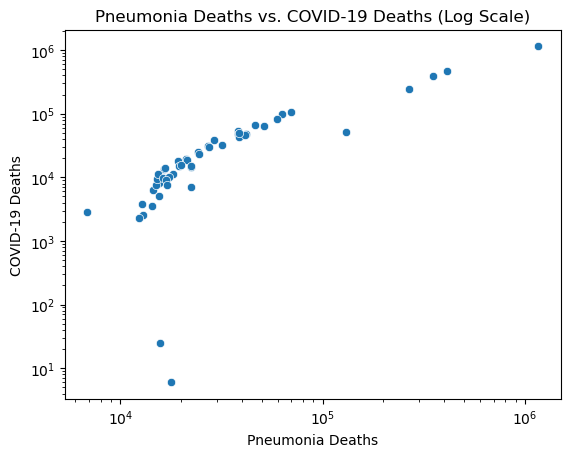

In [11]:
sns.scatterplot(data=CDC_filtered, x='Pneumonia Deaths', y='COVID-19 Deaths', legend='full')
plt.yscale('log')
plt.xscale('log')
plt.title('Pneumonia Deaths vs. COVID-19 Deaths (Log Scale)')

In [12]:
CDC_age_total = CDC_data[(CDC_data['State'] == 'United States') & (CDC_data['Sex'] == 'All Sexes') & (CDC_data['Start Date'] == '01/01/2020') & (CDC_data['End Date'] == '09/23/2023')]
CDC_age_total = CDC_age_total[CDC_age_total['Age Group'] != 'All Ages']
CDC_age_total['Covid Death Proportion'] = CDC_age_total['COVID-19 Deaths']/CDC_age_total['Total Deaths']
CDC_age_total

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote,Covid Death Proportion
1,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,Under 1 year,519.0,73213.0,1056.0,95.0,64.0,1541.0,NaN,0.007089
2,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,0-17 years,1696.0,130970.0,2961.0,424.0,509.0,4716.0,NaN,0.012950
3,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,1-4 years,285.0,14299.0,692.0,66.0,177.0,1079.0,NaN,0.019931
4,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,5-14 years,509.0,22008.0,818.0,143.0,219.0,1390.0,NaN,0.023128
5,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,15-24 years,3021.0,133459.0,3175.0,1257.0,206.0,5133.0,NaN,0.022636
6,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,18-29 years,7030.0,231382.0,7038.0,3162.0,329.0,11206.0,NaN,0.030383
7,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,25-34 years,12401.0,278680.0,11706.0,5842.0,464.0,18689.0,NaN,0.044499
8,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,30-39 years,19886.0,348041.0,18395.0,9766.0,644.0,29114.0,NaN,0.057137
9,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,35-44 years,30108.0,416477.0,27301.0,15228.0,797.0,42904.0,NaN,0.072292
10,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,40-49 years,46260.0,511478.0,41105.0,24074.0,1002.0,64168.0,NaN,0.090444


/Users/kadenchien/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'COVID-19 Deaths by Age Group in the United States')

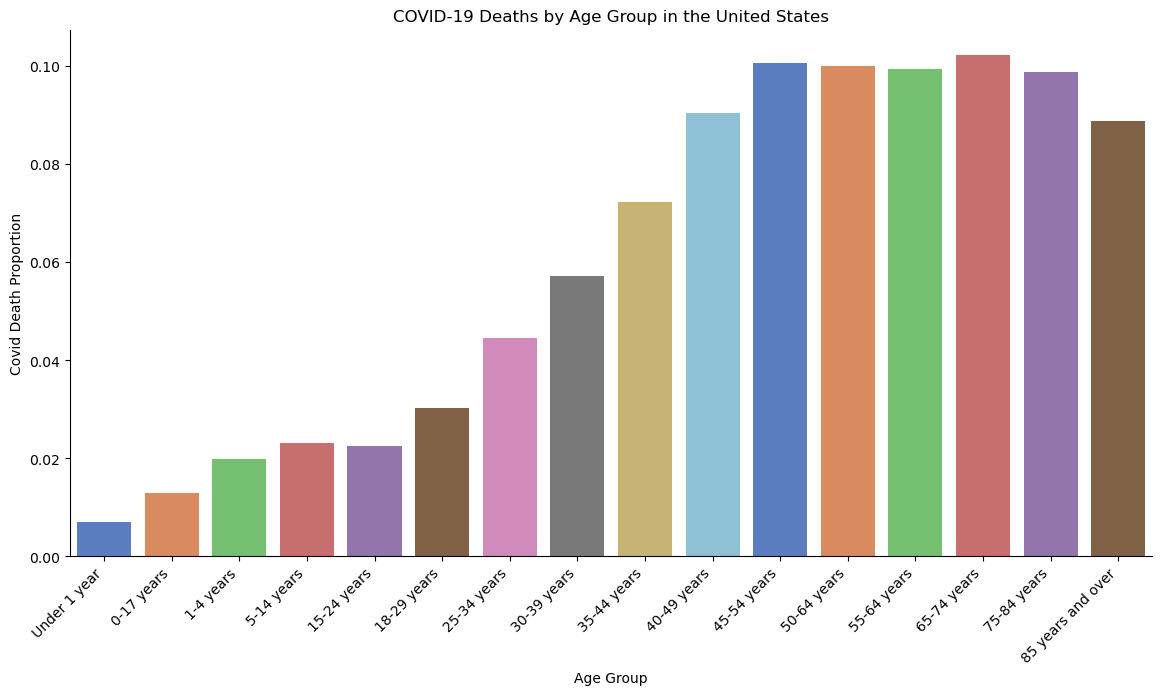

In [13]:
plot = sns.catplot(x='Age Group', y='Covid Death Proportion', data=CDC_age_total, kind='bar', palette='muted', height=6, aspect=2)
plot.set_xticklabels(rotation=45, ha='right')
plt.title('COVID-19 Deaths by Age Group in the United States')

# Underlying Conditions

To answer our first question: "How do underlying diseases, such as pneumonia, asthma, and diabetes, influence the mortality rate among patients?" we investigate two dataset: the CDC and kaggle datasets, since those give us information on various underlying diseases along with COVID data.

In [14]:
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.feature_extraction.text import CountVectorizer

First, we plot some data to give us a baseline understanding of what we are investigating

In [15]:
kaggle_data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [16]:
kaggle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

we want to find the relationship between deaths and underlying conditions. For underlying conditions, the variables are already encoded as yes or no (1 or 2). However, for deaths, there is no column. Fortunately, date_died helps us with this, since we know that any row where the date_died is 9999-99-99 means no death. So, we can encode that to a binary variable of 0 or 1.

In [17]:
kaggle_data["death"] = (kaggle_data["DATE_DIED"] != "9999-99-99").astype(int)

In the kaggle dataset, the binary variables are encoded as 1 for yes and 2 for no. For consistency, the following code replaces all of the 2's with 0's so that for all variables we inspect, 1 is yes and 0 is no.

In [18]:
kaggle_data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,death
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,1,2,2,2,2,2,3,97,1
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,1,2,2,1,1,2,5,97,1
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,3,2,1
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,7,97,1
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,1,2,2,2,2,2,3,97,1


In [19]:
kaggle_data["PNEUMONIA"] = kaggle_data["PNEUMONIA"].replace([2, 97, 98, 99], 0)
kaggle_data["ASTHMA"] = kaggle_data["ASTHMA"].replace([2, 97, 98, 99], 0)
kaggle_data["DIABETES"] = kaggle_data["DIABETES"].replace([2, 97, 98, 99], 0)
kaggle_data["OBESITY"] = kaggle_data["OBESITY"].replace([2, 97, 98, 99], 0)
kaggle_data["HIPERTENSION"] = kaggle_data["HIPERTENSION"].replace([2, 97, 98, 99], 0)
kaggle_data["CARDIOVASCULAR"] = kaggle_data["CARDIOVASCULAR"].replace([2, 97, 98, 99], 0)

Now, we have a binary variable that shows us if a patient died or not, and we can perform chi-squared tests to see if there is any significance

In [20]:
contingency_table_pneumonia = pd.crosstab(kaggle_data['death'], kaggle_data["PNEUMONIA"])
chi2, p_value, dof, expected = chi2_contingency(contingency_table_pneumonia)
print("Chi-squared statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)

Chi-squared statistic: 230913.75106883777
P-value: 0.0
Degrees of freedom: 1
Expected frequencies:
[[841870.6634442 129762.3365558]
 [ 66666.3365558  10275.6634442]]


In [21]:
contingency_table_diabetes = pd.crosstab(kaggle_data['death'], kaggle_data["DIABETES"])
chi2, p_value, dof, expected = chi2_contingency(contingency_table_diabetes)
print("Chi-squared statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)

Chi-squared statistic: 48700.83467061007
P-value: 0.0
Degrees of freedom: 1
Expected frequencies:
[[855815.40274945 115817.59725055]
 [ 67770.59725055   9171.40274945]]


In [22]:
contingency_table_asthma = pd.crosstab(kaggle_data['death'], kaggle_data["ASTHMA"])
chi2, p_value, dof, expected = chi2_contingency(contingency_table_asthma)
print("Chi-squared statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)

Chi-squared statistic: 335.8211815239055
P-value: 5.187513684102302e-75
Degrees of freedom: 1
Expected frequencies:
[[942377.68008869  29255.31991131]
 [ 74625.31991131   2316.68008869]]


In [23]:
contingency_table_obesity = pd.crosstab(kaggle_data['death'], kaggle_data["OBESITY"])
chi2, p_value, dof, expected = chi2_contingency(contingency_table_obesity)
print("Chi-squared statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)

Chi-squared statistic: 3364.3741729174926
P-value: 0.0
Degrees of freedom: 1
Expected frequencies:
[[823543.92718404 148089.07281596]
 [ 65215.07281596  11726.92718404]]


Clearly, there is a significant association between deaths and these underlying conditions. To confirm, we will conduct tests on the CDC dataset.

In [24]:
kaggle_data['death_pneumonia'] = kaggle_data['death'] & kaggle_data['PNEUMONIA']

In [25]:
kaggle_data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,death,death_pneumonia
0,2,1,1,1,03/05/2020,97,1,65,2,0,...,1,2,0,0,2,2,3,97,1,1
1,2,1,2,1,03/06/2020,97,1,72,97,0,...,1,2,0,1,1,2,5,97,1,1
2,2,1,2,2,09/06/2020,1,0,55,97,1,...,0,2,0,0,2,2,3,2,1,0
3,2,1,1,1,12/06/2020,97,0,53,2,0,...,0,2,0,0,2,2,7,97,1,0
4,2,1,2,1,21/06/2020,97,0,68,97,1,...,1,2,0,0,2,2,3,97,1,0


In [26]:
# Drop any rows with missing values in either column
CDC_data = CDC_data.dropna(subset=['COVID-19 Deaths', 'Pneumonia Deaths'])

data = CDC_data[['COVID-19 Deaths']].values
target = CDC_data['Pneumonia Deaths'].values

linear_model_1 = LinearRegression().fit(X=data, y=target)
predicted = linear_model_1.predict(data)

mse = mean_squared_error(target, predicted)
r2 = r2_score(target, predicted)

print("Model MSE:", mse)
print("Model R2:", r2)

Model MSE: 482815.57495580055
Model R2: 0.9888824247737662


Text(0.5, 1.0, 'COVID-19 Deaths vs. Pneumonia Deaths')

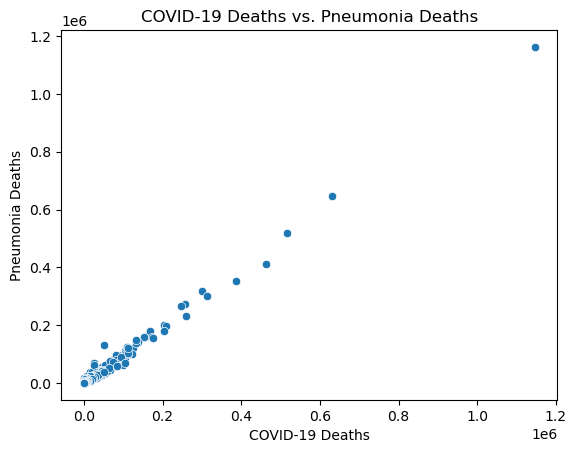

In [27]:
sns.scatterplot(data=CDC_data, x='COVID-19 Deaths', y='Pneumonia Deaths', legend='full')
plt.title('COVID-19 Deaths vs. Pneumonia Deaths')

# Pregnant vs non-pregnant individuals

The only dataset that gives us information about pregnancy is the kaggle dataset, so we inspect this

In [28]:
kaggle_data["PREGNANT"] = kaggle_data["PREGNANT"].replace({2: 0})

In [29]:
pregnant_individuals = kaggle_data[kaggle_data['PREGNANT'] == 1]
non_pregnant_individuals = kaggle_data[kaggle_data['PREGNANT'] == 0]

# Calculate mortality rates for each group
mortality_rate_pregnant = (len(pregnant_individuals[pregnant_individuals['death']==1]) / len(pregnant_individuals)) * 100  # Multiply by 100 for percentage
mortality_rate_non_pregnant = (len(non_pregnant_individuals[non_pregnant_individuals['death']==1]) / len(non_pregnant_individuals)) * 100  # Multiply by 100 for percentage

# Compare mortality rates
print("Mortality rate for pregnant individuals:", mortality_rate_pregnant, "%")
print("Mortality rate for non-pregnant individuals:", mortality_rate_non_pregnant, "%")

Mortality rate for pregnant individuals: 1.094576312876645 %
Mortality rate for non-pregnant individuals: 5.3092585628016735 %


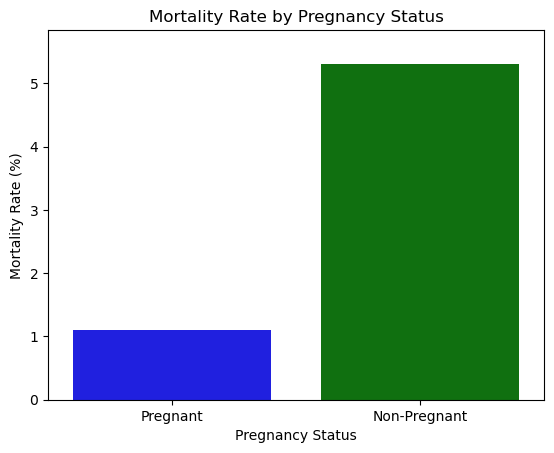

In [37]:
mortality_rates = [mortality_rate_pregnant, mortality_rate_non_pregnant]
sns.barplot(x=['Pregnant', 'Non-Pregnant'], y=mortality_rates, palette=['blue', 'green'])
plt.title('Mortality Rate by Pregnancy Status')
plt.xlabel('Pregnancy Status')
plt.ylabel('Mortality Rate (%)')
plt.ylim(0, max(mortality_rates) * 1.1)
plt.show()

In [30]:
contingency_table_pregnancy = pd.crosstab(kaggle_data['death'], kaggle_data["PREGNANT"])
chi2, p_value, dof, expected = chi2_contingency(contingency_table_pregnancy)
print("Chi-squared statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)
contingency_table_pregnancy

Chi-squared statistic: 7219.6708712800655
P-value: 0.0
Degrees of freedom: 3
Expected frequencies:
[[4.75523116e+05 7.53436609e+03 4.85096978e+05 3.47854019e+03]
 [3.76558841e+04 5.96633910e+02 3.84140222e+04 2.75459808e+02]]


PREGNANT,0,1,97,98
death,,,,
0,485933,8042,473971,3687
1,27246,89,49540,67


# Age and Mortality

How does patient age correlate with mortality rates?

In [32]:
CDC_age_total

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote,Covid Death Proportion
1,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,Under 1 year,519.0,73213.0,1056.0,95.0,64.0,1541.0,NaN,0.007089
2,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,0-17 years,1696.0,130970.0,2961.0,424.0,509.0,4716.0,NaN,0.012950
3,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,1-4 years,285.0,14299.0,692.0,66.0,177.0,1079.0,NaN,0.019931
4,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,5-14 years,509.0,22008.0,818.0,143.0,219.0,1390.0,NaN,0.023128
5,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,15-24 years,3021.0,133459.0,3175.0,1257.0,206.0,5133.0,NaN,0.022636
6,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,18-29 years,7030.0,231382.0,7038.0,3162.0,329.0,11206.0,NaN,0.030383
7,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,25-34 years,12401.0,278680.0,11706.0,5842.0,464.0,18689.0,NaN,0.044499
8,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,30-39 years,19886.0,348041.0,18395.0,9766.0,644.0,29114.0,NaN,0.057137
9,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,35-44 years,30108.0,416477.0,27301.0,15228.0,797.0,42904.0,NaN,0.072292
10,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,40-49 years,46260.0,511478.0,41105.0,24074.0,1002.0,64168.0,NaN,0.090444


In [33]:
CDC_ages = CDC_data[CDC_data['Age Group'] != 'All Ages']
CDC_ages["COVID Death Prop"] = CDC_ages['COVID-19 Deaths']/CDC_ages['Total Deaths']
CDC_ages = CDC_ages.dropna(subset=['COVID Death Prop'])

encoder = OrdinalEncoder(categories=[['Under 1 year', '0-17 years', '1-4 years', '5-14 years', '15-24 years', '18-29 years', '25-34 years', '30-39 years', '35-44 years', '40-49 years', '45-54 years', '50-64 years', '55-64 years', '65-74 years', '75-84 years', '85 years and over']])
CDC_ages['Age Group Encoded'] = encoder.fit_transform(CDC_ages[['Age Group']])

X = CDC_ages[['Age Group Encoded']]
y = CDC_ages['COVID Death Prop']

# Fit linear regression model
linear_model = LinearRegression().fit(X, y)
predicted_age = linear_model.predict(X)

mse_age = mean_squared_error(y, predicted_age)
r2_age = r2_score(y, predicted_age)

print("Model MSE:", mse_age)
print("Model R2:", r2_age)

Model MSE: 0.007187370040300406
Model R2: 0.14010700691486155


/var/folders/jq/jnqtzs3936l4f7qct6s9ww9c0000gn/T/ipykernel_67102/3593112106.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CDC_ages["COVID Death Prop"] = CDC_ages['COVID-19 Deaths']/CDC_ages['Total Deaths']


Text(0.5, 1.0, 'Age Group Encoded vs. COVID-19 Deaths')

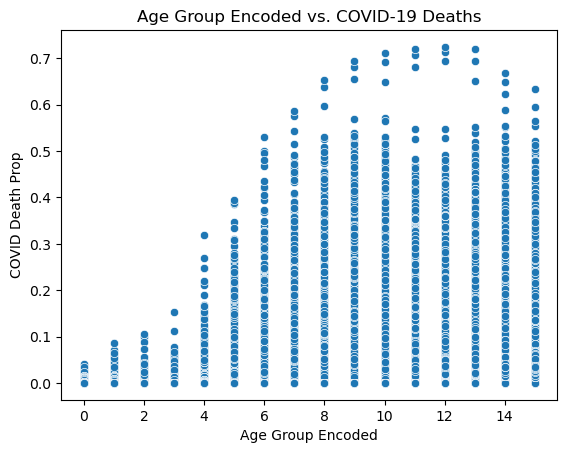

In [34]:
sns.scatterplot(data=CDC_ages, x='Age Group Encoded', y='COVID Death Prop', legend='full')
plt.title('Age Group Encoded vs. COVID-19 Deaths')

Text(0.5, 1.0, 'Age vs. Death Percentage')

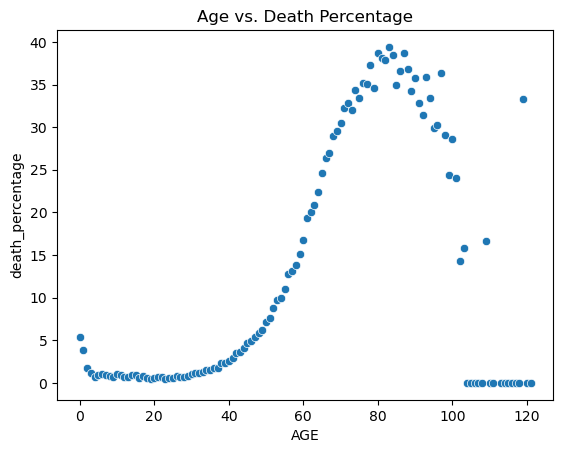

In [35]:
age_group_stats = kaggle_data.groupby('AGE')['death'].agg(['count', 'sum'])
age_group_stats['death_percentage'] = (age_group_stats['sum'] / age_group_stats['count']) * 100

sns.scatterplot(data=age_group_stats, x='AGE', y='death_percentage', legend='full')
plt.title('Age vs. Death Percentage')